## Import libraries

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive

from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix,\
        accuracy_score, classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,GradientBoostingClassifier,StackingClassifier,ExtraTreesClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.naive_bayes import GaussianNB

from time import time
from datetime import timedelta

import seaborn as sns
from matplotlib import pyplot as plt

sns.set()


## Load dataset

In [2]:
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/ML/Machine Learning Project. GALINDO - PAGLIA/kickafterpreprocess.csv', sep=";")

Mounted at /content/drive


In [3]:
df.columns

Index(['IsBadBuy', 'Auction', 'VehicleAge', 'SubModel', 'Color',
       'Transmission', 'WheelType', 'VehOdo', 'Nationality', 'Size', 'VNST',
       'VehBCost', 'IsOnlineSale', 'WarrantyCost', 'season', 'age_cat',
       'VehOdo_cat', 'VehBCost_cat', 'WarrantyCost_cat'],
      dtype='object')

In [4]:
df.head()

,IsBadBuy,Auction,VehicleAge,SubModel,Color,Transmission,WheelType,VehOdo,Nationality,Size,VNST,VehBCost,IsOnlineSale,WarrantyCost,season,age_cat,VehOdo_cat,VehBCost_cat,WarrantyCost_cat
0,0,ADESA,3,SEDAN,RED,AUTO,Alloy,89046,ASIAN,MEDIUM,EAST,7100.0,no,1113,winter,0to3_years,>82383,6710-7900,837-1155
1,0,ADESA,5,CAB,WHITE,AUTO,Alloy,93593,AMERICAN,TRUCK,EAST,7600.0,no,1053,winter,3to6_years,>82383,6710-7900,837-1155
2,0,ADESA,4,SEDAN,MAROON,AUTO,Covers,73807,AMERICAN,MEDIUM,EAST,4900.0,no,1389,winter,3to6_years,73322-82383,0-5440,1155-1623
3,0,ADESA,5,SEDAN,SILVER,AUTO,Alloy,65617,AMERICAN,COMPACT,EAST,4100.0,no,630,winter,3to6_years,61815-73322,0-5440,0-837
4,0,ADESA,4,COUPE,SILVER,MANUAL,Covers,69367,AMERICAN,COMPACT,EAST,4000.0,no,1020,winter,3to6_years,61815-73322,0-5440,837-1155


In [5]:
df = df.drop('age_cat',axis=1)
df = df.drop('VehOdo_cat',axis=1)
df = df.drop('VehBCost_cat',axis=1)
df = df.drop('WarrantyCost_cat',axis=1)


df.head()


,IsBadBuy,Auction,VehicleAge,SubModel,Color,Transmission,WheelType,VehOdo,Nationality,Size,VNST,VehBCost,IsOnlineSale,WarrantyCost,season
0,0,ADESA,3,SEDAN,RED,AUTO,Alloy,89046,ASIAN,MEDIUM,EAST,7100.0,no,1113,winter
1,0,ADESA,5,CAB,WHITE,AUTO,Alloy,93593,AMERICAN,TRUCK,EAST,7600.0,no,1053,winter
2,0,ADESA,4,SEDAN,MAROON,AUTO,Covers,73807,AMERICAN,MEDIUM,EAST,4900.0,no,1389,winter
3,0,ADESA,5,SEDAN,SILVER,AUTO,Alloy,65617,AMERICAN,COMPACT,EAST,4100.0,no,630,winter
4,0,ADESA,4,COUPE,SILVER,MANUAL,Covers,69367,AMERICAN,COMPACT,EAST,4000.0,no,1020,winter


In [6]:
from sklearn.model_selection import train_test_split
df = pd.get_dummies(df,drop_first=True)

In [7]:
from sklearn.preprocessing import StandardScaler
escalar = StandardScaler()

dfnum = df[['VehicleAge','VehOdo','VehBCost','WarrantyCost']]
escalar.fit(dfnum)
dfnum2=escalar.transform(dfnum)
dfnum=pd.DataFrame(dfnum2)
dfnum.columns =['VehicleAge','VehOdo','VehBCost','WarrantyCost']

In [8]:
df = pd.concat([df['IsBadBuy'],
                dfnum,
                df.iloc[:, 5:]
                ], axis='columns')
df.columns

Index(['IsBadBuy', 'VehicleAge', 'VehOdo', 'VehBCost', 'WarrantyCost',
       'Auction_MANHEIM', 'Auction_OTHER', 'SubModel_COUPE', 'SubModel_CUV',
       'SubModel_MINIVAN', 'SubModel_OTHER', 'SubModel_PASSENGER',
       'SubModel_SEDAN', 'SubModel_SPORT', 'SubModel_SUV', 'SubModel_WAGON',
       'Color_BLACK', 'Color_BLUE', 'Color_BROWN', 'Color_GOLD', 'Color_GREEN',
       'Color_GREY', 'Color_MAROON', 'Color_ORANGE', 'Color_OTHER',
       'Color_PURPLE', 'Color_RED', 'Color_SILVER', 'Color_WHITE',
       'Color_YELLOW', 'Transmission_MANUAL', 'WheelType_Covers',
       'WheelType_Special', 'Nationality_ASIAN', 'Nationality_OTHER',
       'Size_LARGE', 'Size_MEDIUM', 'Size_OTHER', 'Size_SUV', 'Size_TRUCK',
       'Size_VAN', 'VNST_EAST', 'VNST_WEST', 'IsOnlineSale_yes',
       'season_spring', 'season_summer', 'season_winter'],
      dtype='object')

In [9]:
df

,IsBadBuy,VehicleAge,VehOdo,VehBCost,WarrantyCost,Auction_MANHEIM,Auction_OTHER,SubModel_COUPE,SubModel_CUV,SubModel_MINIVAN,...,Size_OTHER,Size_SUV,Size_TRUCK,Size_VAN,VNST_EAST,VNST_WEST,IsOnlineSale_yes,season_spring,season_summer,season_winter
0,0,-0.682127,1.206796,0.207540,-0.272237,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0.490058,1.518787,0.491178,-0.372706,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2,0,-0.096035,0.161175,-1.040468,0.189919,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0.490058,-0.400779,-1.494289,-1.081011,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,-0.096035,-0.143474,-1.551016,-0.427964,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69727,0,-0.682127,-0.228556,-1.437561,-0.101440,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
69728,0,1.662243,1.529148,-0.303008,0.129638,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
69729,0,-1.268220,0.202344,0.831544,-0.791326,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
69730,0,0.490058,0.761966,0.150813,-0.054555,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [10]:
from sklearn.model_selection import train_test_split
y=df['IsBadBuy']
X=df.drop(columns='IsBadBuy')
X_learn, X_test, y_learn, y_test = train_test_split(X, y, test_size=0.20, random_state=2022)
X_train, X_val, y_train, y_val = train_test_split(X_learn, y_learn, test_size=0.20, random_state=2022)

# Modelling

## Metrics

In [11]:
def confusion(true, pred):
    """
    Function for pretty printing confusion matrices
    """
    pred = pd.Series(pred)
    true = pd.Series(true)
    
    true.name = 'target'
    pred.name = 'predicted'
    cm = pd.crosstab(true.reset_index(drop=True), pred.reset_index(drop=True))
    cm = cm[cm.index]
    return cm

In [12]:
def compute_metrics(y_true,y_pred):
    accuracy = accuracy_score(y_true,y_pred)
    f1_score_1 = f1_score(y_true,y_pred,average='binary',pos_label=1)
    f1_score_0 = f1_score(y_true,y_pred,average='binary',pos_label=0)
    f1_score_macro = f1_score(y_true,y_pred,average='macro')
    return [accuracy,f1_score_1,f1_score_0,f1_score_macro]
    
    

results = pd.DataFrame(columns=['Accuracy', 'F1-score (class 1)', 'F1-score (class 0)', 'F1-score (macro avg)'])

## Decision Tree

In [13]:
X_learn

,VehicleAge,VehOdo,VehBCost,WarrantyCost,Auction_MANHEIM,Auction_OTHER,SubModel_COUPE,SubModel_CUV,SubModel_MINIVAN,SubModel_OTHER,...,Size_OTHER,Size_SUV,Size_TRUCK,Size_VAN,VNST_EAST,VNST_WEST,IsOnlineSale_yes,season_spring,season_summer,season_winter
20354,-0.682127,-1.028330,-0.643374,0.375786,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
31876,-1.268220,-0.493615,1.682459,-0.754488,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4607,-0.096035,-0.863037,-0.870285,-0.873376,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
60551,-1.268220,1.838463,1.064128,1.075719,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
463,1.076150,0.483733,-1.834655,1.280006,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2066,0.490058,-1.246525,-0.152680,0.375786,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
57176,1.662243,-0.170371,0.613143,0.400904,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
46769,1.662243,0.243033,-1.256033,1.084092,1,0,0,0,1,0,...,0,0,0,1,1,0,0,1,0,0
16557,-0.096035,1.109637,0.831544,-0.054555,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [14]:
y_learn

20354    0
31876    0
4607     0
60551    0
463      0
        ..
2066     0
57176    0
46769    0
16557    0
1244     0
Name: IsBadBuy, Length: 55785, dtype: int64

In [15]:
#X_learn, X_test, y_learn, y_test = train_test_split(X, y, test_size=0.20, random_state=2022)
#X_train, X_val, y_train, y_val = train_test_split(X_learn, y_learn, test_size=0.20, random_state=2022)
model_tree = DecisionTreeClassifier().fit(X_train, y_train)

In [16]:
model_tree.fit


<bound method DecisionTreeClassifier.fit of DecisionTreeClassifier()>

In [17]:
import graphviz
import pydot
import pydotplus

dot_data = export_graphviz(model_tree, out_file=None, 
                         feature_names=X_train.columns,  
                         class_names=['NotBadBuy', 'BadBuy'],  
                         filled=True, 
                         max_depth = 10,
                         rotate=True)  
#graph

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("DT.pdf")


True

In [18]:
model_tree.get_depth()

40

In [19]:
model_tree.get_depth()

40

In [20]:
y_train

59881    0
28834    1
61428    0
65951    0
5911     0
        ..
29873    0
62049    1
36470    1
25063    0
30904    0
Name: IsBadBuy, Length: 44628, dtype: int64

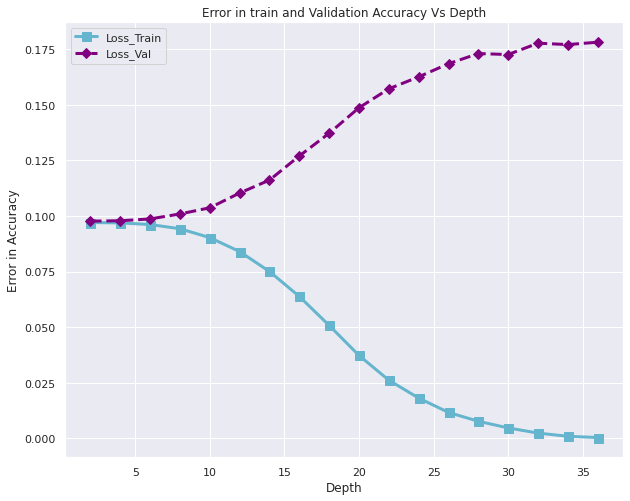

In [21]:
def max_depth(min,max):
    depth=[]
    tr_ac=[]
    va_ac=[]
    for i in range(min,max,2):
        model =DecisionTreeClassifier(max_depth=i, random_state=42)
        model.fit(X_train,y_train)
        depth.append(i)
        tr_ac.append(model.score(X_train,y_train))
        va_ac.append(model.score(X_val,y_val))
        
    tr_ac=1-np.array(tr_ac);
    va_ac=1-np.array(va_ac);
    
    plt.figure(figsize=(10,8))
    plt.title('Error in train and Validation Accuracy Vs Depth')
    plt.xlabel('Depth')
    plt.ylabel('Error in Accuracy')
    plt.plot(depth,tr_ac,'cs-',linewidth=3,markersize=9)
    plt.plot(depth,va_ac,'D--',color='purple',linewidth=3, markersize=7)
    plt.legend(['Loss_Train','Loss_Val']);
    plt.show()
max_depth(2,37)


In [22]:
y_pred = model_tree.predict(X_val)

#y_pred = np.where(y_pred == 'yes', 1, 0)
#y_val = np.where(y_val == 'yes', 1, 0)

results.loc['DT-default',:] = compute_metrics(y_val, y_pred)

confusion(y_val, y_pred)

predicted,0,1
target,,
0,8974,1093
1,916,174


In [23]:
print(classification_report(y_val,
                            y_pred,
                            target_names=['no', 'yes'],))

results

              precision    recall  f1-score   support

          no       0.91      0.89      0.90     10067
         yes       0.14      0.16      0.15      1090

    accuracy                           0.82     11157
   macro avg       0.52      0.53      0.52     11157
weighted avg       0.83      0.82      0.83     11157



,Accuracy,F1-score (class 1),F1-score (class 0),F1-score (macro avg)
DT-default,0.819934,0.147645,0.899334,0.523489


In [24]:
print('Tree depth: {}\nNodes: {}'.format(model_tree.tree_.max_depth, model_tree.tree_.node_count))

Tree depth: 40
Nodes: 12007


In [25]:
criterion = ['gini', 'entropy']

max_dephts = [None, 4, 6, 10, 20]
min_samples_split = [1, 2, 4, 9,  90]
min_samples_leaf = [1, 2, 4, 9,  90]
max_features = ['sqrt', 'log2', None]

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

init_time = time()
model_tree = DecisionTreeClassifier()

f1_class_0_scorer = make_scorer(f1_score, pos_label=0)
f1_class_1_scorer = make_scorer(f1_score, pos_label=1)

scoring_dict = {
    'f1_mac': 'f1_macro',
    'f1_class_0': f1_class_0_scorer,
    'f1_class_1': f1_class_1_scorer,
    'acc': 'accuracy'
}

trc = GridSearchCV(estimator=model_tree,
                   scoring=scoring_dict,
                   param_grid={
                       'criterion': criterion,
                       'max_features': max_features,
                       'max_depth': max_dephts,
                       'min_samples_split': min_samples_split,
                       'min_samples_leaf': min_samples_leaf
                   },
                   cv=5,
                   return_train_score=False,
                   refit='f1_mac')

model_5CV = trc.fit(X_train, y_train)
print(timedelta(seconds=(time() - init_time)))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
750 fits failed out of a total of 3750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
750 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a flo

0:06:07.262062


In [26]:
scoring_cols = [
    'param_criterion', 'param_max_depth', 'param_max_features',
    'param_min_samples_leaf', 'param_min_samples_split', 'mean_test_f1_mac',
    'mean_test_f1_class_0', 'mean_test_f1_class_1', 'mean_test_acc'
]

pd.DataFrame(model_5CV.cv_results_).sort_values(by='mean_test_f1_mac',
                                                 ascending=False)[scoring_cols].head() #Guardar en el excel 

,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,mean_test_f1_mac,mean_test_f1_class_0,mean_test_f1_class_1,mean_test_acc
437,entropy,None,None,4,4,0.527351,0.920513,0.134190,0.854396
436,entropy,None,None,4,2,0.526272,0.920383,0.132161,0.854150
438,entropy,None,None,4,9,0.526197,0.920438,0.131955,0.854239
376,entropy,None,sqrt,1,2,0.525879,0.905990,0.145769,0.830622
53,gini,None,None,1,9,0.525618,0.917150,0.134086,0.848772


In [27]:
scoring_cols = [
    'param_criterion', 'param_max_depth', 'param_max_features',
    'param_min_samples_leaf', 'param_min_samples_split', 'mean_test_f1_mac',
    'mean_test_f1_class_0', 'mean_test_f1_class_1', 'mean_test_acc'
]

pd.DataFrame(model_5CV.cv_results_).sort_values(by='mean_test_f1_mac',
                                                 ascending=False)[scoring_cols].head()
pd.DataFrame(model_5CV.cv_results_).to_excel("scoring_cols.xlsx")  

In [28]:
best_params = model_5CV.best_params_
best_params

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 4,
 'min_samples_split': 4}

In [29]:
y_pred = model_5CV.predict(X_val)

results.loc['DT-best',:] = compute_metrics(y_val, y_pred)

confusion(y_val,y_pred)
results.sort_values(by='F1-score (macro avg)', ascending=False)

,Accuracy,F1-score (class 1),F1-score (class 0),F1-score (macro avg)
DT-best,0.848884,0.138037,0.917182,0.52761
DT-default,0.819934,0.147645,0.899334,0.523489


In [30]:
DT_model_tuned = DecisionTreeClassifier(**best_params)
DT_model_tuned.fit(X_train, y_train)

y_pred = DT_model_tuned.predict(X_val)

results.loc['DT-best', :] = compute_metrics(y_val, y_pred)

results.sort_values(by='F1-score (macro avg)', ascending=False)

,Accuracy,F1-score (class 1),F1-score (class 0),F1-score (macro avg)
DT-best,0.849243,0.137436,0.917403,0.52742
DT-default,0.819934,0.147645,0.899334,0.523489


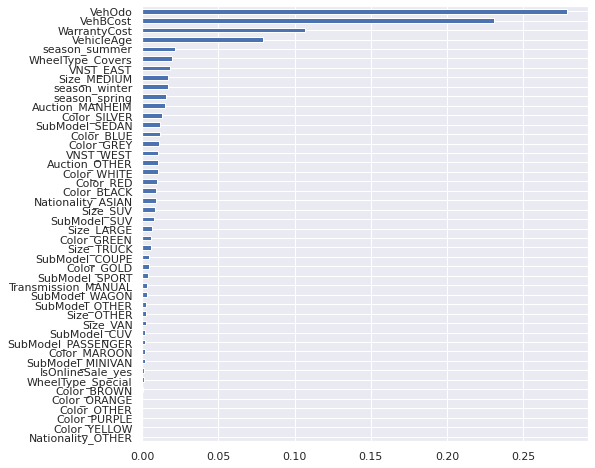

In [31]:

var_imp = pd.DataFrame({'importance': DT_model_tuned.feature_importances_},
                       index=X_train.columns)

var_imp.sort_values(by='importance').plot.barh(figsize=(8,8),
                                               legend=False);


## Random Forest

We also introduce the **Out-of-Bag** (OOB) error. This error is a metric that we can compute on Random Forest model while training. It is very very useful because it allows us to perform model selection (tune hyperparameters) without having to execute costly cross-validations.

While training, RF separates the data into subsets with replacement and trains the different trees of the forest with them. The OOB score is obtained by computing the accuracy of the trees on a set of samples that are not being used to train each specific tree. So, it acts as a **validation** score rather than a training one.


In [32]:
model_rf1 = RandomForestClassifier(oob_score=True).fit(X_train, y_train)

pred = model_rf1.predict(X_train)

confusion(y_train,pred)

print(classification_report(y_train,
                            pred,
                            target_names=['NotBadBuy', 'BadBuy'],))

print('OOB accuracy=', model_rf1.oob_score_)

              precision    recall  f1-score   support

   NotBadBuy       1.00      1.00      1.00     40296
      BadBuy       1.00      1.00      1.00      4332

    accuracy                           1.00     44628
   macro avg       1.00      1.00      1.00     44628
weighted avg       1.00      1.00      1.00     44628

OOB accuracy= 0.9016312628842879


In [33]:
y_pred = model_rf1.predict(X_val)
print('Validation Accuracy:{}'.format(model_rf1.score(X_val,y_val)))
results.loc['RF-default',:] = compute_metrics(y_val,y_pred)
confusion(y_val,y_pred)

Validation Accuracy:0.9017657076274984


predicted,0,1
target,,
0,10057,10
1,1086,4


In [34]:
results.sort_values(by='F1-score (macro avg)', ascending=False)

,Accuracy,F1-score (class 1),F1-score (class 0),F1-score (macro avg)
DT-best,0.849243,0.137436,0.917403,0.52742
DT-default,0.819934,0.147645,0.899334,0.523489
RF-default,0.901766,0.007246,0.948326,0.477786


In [35]:
model_rf2 = RandomForestClassifier(n_estimators=100, 
                                   oob_score=True, 
                                   class_weight='balanced').fit(X_train, y_train)

pred = model_rf2.predict(X_train)

confusion(y_train, pred)

print(classification_report(y_train,pred,target_names=['no', 'yes'],))

print('OOB accuracy=', model_rf2.oob_score_)

              precision    recall  f1-score   support

          no       1.00      1.00      1.00     40296
         yes       1.00      1.00      1.00      4332

    accuracy                           1.00     44628
   macro avg       1.00      1.00      1.00     44628
weighted avg       1.00      1.00      1.00     44628

OOB accuracy= 0.9020121896567178


In [36]:
y_pred = model_rf2.predict(X_val)

results.loc['RF-balance',:] = compute_metrics(y_val,y_pred)

confusion(y_val,y_pred)

predicted,0,1
target,,
0,10059,8
1,1086,4


In [37]:
results.sort_values(by='F1-score (macro avg)', ascending=False)

,Accuracy,F1-score (class 1),F1-score (class 0),F1-score (macro avg)
DT-best,0.849243,0.137436,0.917403,0.52742
DT-default,0.819934,0.147645,0.899334,0.523489
RF-balance,0.901945,0.00726,0.948425,0.477842
RF-default,0.901766,0.007246,0.948326,0.477786


In [39]:
init_time = time()

rf_model = RandomForestClassifier()


ntrees = [100,200,500]
max_depth = [None, 4, 10, 20]
min_samples_split = [2, 4, 9]
min_samples_leaf = [2, 4, 9]
balance = [None, 'balanced', 'balanced_subsample']

trc = GridSearchCV(estimator=rf_model,
                   scoring=scoring_dict,
                   param_grid={
                       'n_estimators': ntrees,
                       'max_depth':max_depth,
                       'min_samples_split':min_samples_split,
                       'min_samples_leaf':min_samples_leaf, 
                       'class_weight':balance
                   },
                   cv=5,
                   return_train_score=False,
                   refit=False,
                   verbose=2,
                   n_jobs=-1)

model_5CV = trc.fit(X_train, y_train)
print(timedelta(seconds=(time() - init_time)))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
2:24:52.845014


In [40]:
scoring_cols = [
    'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
    'mean_test_f1_mac', 'mean_test_f1_class_0', 'mean_test_f1_class_1',
    'mean_test_acc'
]
pd.DataFrame(model_5CV.cv_results_).sort_values(
    by='mean_test_f1_mac', ascending=False)[scoring_cols].head()

,param_max_depth,param_min_samples_leaf,param_min_samples_split,mean_test_f1_mac,mean_test_f1_class_0,mean_test_f1_class_1,mean_test_acc
242,None,9,9,0.568314,0.894725,0.241904,0.815138
128,None,9,2,0.568248,0.893954,0.242542,0.813973
236,None,9,2,0.567690,0.894274,0.241107,0.814421
134,None,9,9,0.567536,0.894446,0.240626,0.814668
240,None,9,9,0.567307,0.892455,0.242159,0.811665


In [41]:
best_params = pd.DataFrame(model_5CV.cv_results_).sort_values(by='mean_test_f1_mac',ascending=False)[['params']].iloc[0,0]
best_params

{'class_weight': 'balanced_subsample',
 'max_depth': None,
 'min_samples_leaf': 9,
 'min_samples_split': 9,
 'n_estimators': 500}

In [ ]:
rf_model_tuned = RandomForestClassifier(**best_params)
rf_model_tuned.fit(X_train, y_train)

y_pred = rf_model_tuned.predict(X_val)

results.loc['RF-best', :] = compute_metrics(y_val, y_pred)

results.sort_values(by='F1-score (macro avg)', ascending=False)

In [ ]:
confusion(y_val, y_pred)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn import datasets, ensemble, tree
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVC
import lightgbm as lgb
from lightgbm import LGBMRegressor 
import xgboost 
from xgboost import XGBRegressor

In [ ]:
models ={"Linear Regression":LinearRegression(),
          "Random Forest":RandomForest(), 
          "LogisticRegression":LogisticRegression(), 
          "GradientBoosting":GradientBoostingRegressor(),
          "SVMRegressor": SVC()}
data={}
for name, model in models.items():
  model_fit=model.fit(X_train,y_train)
  y_pred=model_fit.predict(X_val)
  metrics=[mean_squared_error(y_val, y_pred),mean_absolute_error(y_val, y_pred)]
  data[name]=metrics


In [ ]:
metrics=pd.DataFrame.from_dict(data, orient='index', columns=['MSE', 'MAE'])
metrics.sort_values(["MSE", "MAE"], ascending=(True, False))

In [ ]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

from sklearn.metrics import confusion_matrix, \
                  classification_report, accuracy_score,  precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split,  KFold, cross_validate, GridSearchCV

In [ ]:
logreg = LogisticRegressionCV(Cs=20, random_state=1, cv = 10, scoring = 'accuracy')

logreg.fit(X_train, y_train)

In [ ]:
avg_crossval_scores = logreg.scores_[1].mean(axis=0)
idx = np.argmax(avg_crossval_scores)
best_C = logreg.Cs_[idx]
print(best_C)

In [ ]:
results_df = pd.DataFrame(index=[], columns= ['Accuracy', 'F1 Macro', 'Precision Macro', 'Recall Macro'])

In [ ]:
logreg = LogisticRegression(C=best_C)
cross_val_results = pd.DataFrame(cross_validate(logreg, X_train, y_train, cv = 5, scoring = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'] ))

results_df.loc['Logistic Regression',:] = cross_val_results[['test_accuracy', 'test_f1_macro',
       'test_precision_macro', 'test_recall_macro']].mean().values

results_df.sort_values(by='Accuracy', ascending=False)

In [ ]:
best_model = metrics.sort_values(["MSE", "MAE", "R2"], ascending=(False, False, True))
best_model["name"]=best_model.index

In [ ]:
name_bm = best_model.iloc[0].name
name_bm

In [ ]:
data2={}
model_fit=models[name_bm].fit(X_learn, y_learn)
y_pred=model_fit.predict(X_learn)
metrics2=[mean_squared_error(y_learn, y_pred),mean_absolute_error(y_learn, y_pred),r2_score(y_learn, y_pred)]
data2[name_bm]=metrics2

In [ ]:
data2

check results with an specific observation

In [ ]:
X_test_ex = X_test.iloc[616]
y_test_ex = y_test.iloc[616]

In [ ]:
predicted = models[name_bm].predict([X_test_ex])
expected = y_test_ex

In [ ]:
print(predicted, expected)

In [ ]:
from sklearn.model_selection import train_test_split
inputs,val_inputs,targets,val_targets = train_test_split(train_df,targets,test_size=0.25, random_state=42)

X_learn, X_test, y_learn, y_test = train_test_split(X, y, test_size=0.20, random_state=2022)
X_train, X_val, y_train, y_val = train_test_split(X_learn, y_learn, test_size=0.20, random_state=2022)

In [ ]:
y_val

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind

m1 = LogisticRegression(penalty='none')
m2 = LogisticRegression(penalty='L1')
m3 = LogisticRegression(penalty='L2')
m4 = LogisticRegression(penalty='elasticnet')

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

In [ ]:
!pip install graphviz 
!apt-get install graphviz
!pip install -q pydot

In [ ]:
dot_data = export_graphviz(model_tree, out_file=None, 
                         feature_names=X_train.columns,  
                         class_names=['no', 'yes'],  
                         filled=True, rounded=True,  
                         special_characters=True, 
                         rotate=True,
                         proportion=True,
                         max_depth=3)  
graph = graphviz.Source(dot_data)  
graph 